In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/cdbrfss1999.csv


Data Analysis in Astronomy and Physics

Exercise Set 1

**Xiongxiao Wang, Sakshi Pahujani, Mahak Sadhwani**

1.Sampling 

In [2]:
import os
os.getcwd() # get current working dictory

'/kaggle/working'

In [3]:
os.chdir('/kaggle/') #change dirctory to kaggle
os.getcwd()

'/kaggle'

In [4]:
os.listdir('/kaggle') # show the list of dictory 'kaggle'

['src', 'lib', 'input', 'working']

In [5]:
os.listdir('/kaggle/input/dataset')

['cdbrfss1999.csv']

> **Large data**
* > a. Take a sample of 30000 from this dataset and export it to an ASCII file. Make sure that your method allows to draw more than one sample from the population.
* > b. Discuss your method to do so. Is your sampling a “good sample” in the sense that it is representative for the larger “population”? 

solution:
* a.
1. Get the total number of data in file by counting the number of rows and minus 1
2. Set the desired sample size(30000)
3. select (n-s) numbers randomly from range(1,n+1)
4. skip the corresponding rows when reading the csv
* b. 
The method here is simple random sampling,each sample chosen by equal probability, so it's can be representative for larger "population"

In [6]:
import pandas as pd
import random

filename = 'input/dataset/cdbrfss1999.csv'
n = sum(1 for line in open(filename)) - 1 #number of rows in file (excludes header)
s = 30000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #select (n-s) numbers randomly from range(1,n+1). In next step, skip the corresponding row when reading the csv 
cdbr = pd.read_csv(filename,skiprows = skip)
cdbr #display the 30000 samples by dataframe

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STATE,GEOSTR,DENSTR,PSU,RECORD,IMONTH,IDAY,IYEAR,INTVID,Unnamed: 9,...,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281
0,1,1,1,10039,1,1,16,1999,0,NaN,...,1,9,1.0,1,2.0,6,1,1,1,1
1,1,1,1,10105,1,1,11,1999,40,NaN,...,1,9,1.0,1,3.0,9,1,1,1,1
2,1,1,1,10120,1,1,23,1999,33,NaN,...,1,9,1.0,1,1.0,3,1,1,1,1
3,1,1,1,10142,1,1,12,1999,33,NaN,...,1,9,3.0,1,2.0,5,1,1,1,1
4,1,1,1,10155,1,1,12,1999,0,NaN,...,1,9,1.0,1,2.0,7,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,72,1,1,120976,1,12,20,1999,4,NaN,...,2,9,1.0,1,1.0,3,1,2,3,1
29996,72,1,1,121012,1,12,22,1999,9,NaN,...,1,9,1.0,1,3.0,10,2,2,3,1
29997,72,1,1,121021,1,12,19,1999,20,NaN,...,1,9,1.0,1,2.0,4,1,2,3,1
29998,72,1,1,121040,1,12,2,1999,6,NaN,...,1,9,3.0,1,1.0,1,1,2,3,1


**> Large columns**
* > a. Locate the columns corresponding to the variables genhlth, exerany, htf, hti, smoke100, weight, wtdesire, age, and sex.
* > b. Reduce your sample to include only these variables and export it to an ASCII file.

solution:
export this Dataframe into an ASCII file that include only these variables

In [7]:
Large_Columns_b = cdbr[['GENHLTH','EXERANY','HTF','HTI','SMOKE100','WEIGHT','WTDESIRE','AGE','SEX']]
filename_destination= 'working/Large_Columns_b.csv'
Large_Columns_b.to_csv(filename_destination) 
Large_Columns_b  # display the Dataframe that question "Large Column b" required

,GENHLTH,EXERANY,HTF,HTI,SMOKE100,WEIGHT,WTDESIRE,AGE,SEX
0,1,NaN,5,8,1,175,NaN,49,2
1,4,NaN,5,10,1,180,NaN,60,1
2,1,NaN,5,3,2,147,NaN,34,2
3,3,NaN,5,5,1,110,NaN,42,2
4,2,NaN,5,3,2,126,NaN,52,2
...,...,...,...,...,...,...,...,...,...
29995,3,NaN,5,6,2,180,NaN,31,1
29996,3,NaN,5,4,2,120,NaN,69,2
29997,1,NaN,5,1,2,125,NaN,37,2
29998,1,NaN,5,1,2,120,NaN,24,2


> c. How many cases and how many variables are there in your sample? 

(c) 30,000 cases; 9 variables

> d. What type of variable is genhlth?

(d) categorical, ordinal

> e. What type of variable is weight?

(b) numerical, discrete

> f. What type of variable is smoke100?

(c) categorical (not ordinal)

**> One Bar chart**
* > Take all genhlth entries from your sample and draw a bar chart to visualize how the cases are distributed across the possible categories.

[Text(0.5, 0, 'Categories'),
 Text(0, 0.5, 'Frequency'),
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Very Good'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Fair'),
  Text(4, 0, 'Poor'),
  Text(5, 0, "Don't know/Not sure"),
  Text(6, 0, 'Refused')]]

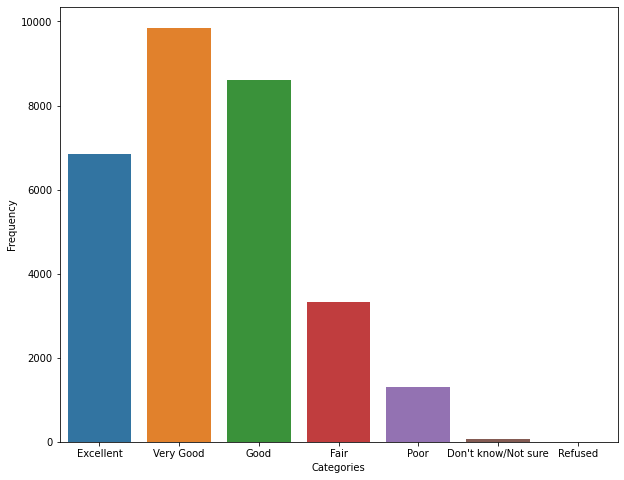

In [8]:
# x axis represents General Health. 1,2,3,4,5,7,9 means Excellent, Very good, Good, Fair, Poor, Don't know, Refused respectively
# y axis represents freuquency
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt



genhlth = Large_Columns_b['GENHLTH']
genhlth_data_count = np.unique(genhlth,return_counts = True)
rcParams['figure.figsize'] = 10,8
ax = sns.barplot(x = genhlth_data_count[0],y = genhlth_data_count[1])
ax.set(xlabel = 'Categories',ylabel = 'Frequency',xticklabels = ["Excellent","Very Good","Good","Fair","Poor","Don't know/Not sure","Refused"])

> Two Bar Charts
* > Combine the smoke100 with the genhlth entries from your sample and draw two bar charts, one showing the health of the smokers and a second one showing the health of the non-smokers.

In [9]:
genhlth_count_ifsmoke = Large_Columns_b.groupby(['SMOKE100','GENHLTH']).SMOKE100.agg('count')
genhlth_count_ifsmoke.describe()
#genhlth_count_ifsmoke['SMOKE100'].describe()
#sns.barplot(x = 'SMOKE100', y = 'count', hue = 'GENHLTH',data = genhlth_count_ifsmoke)

count      23.000000
mean     1304.347826
std      1877.661084
min         1.000000
25%         5.000000
50%        31.000000
75%      2206.500000
max      5424.000000
Name: SMOKE100, dtype: float64

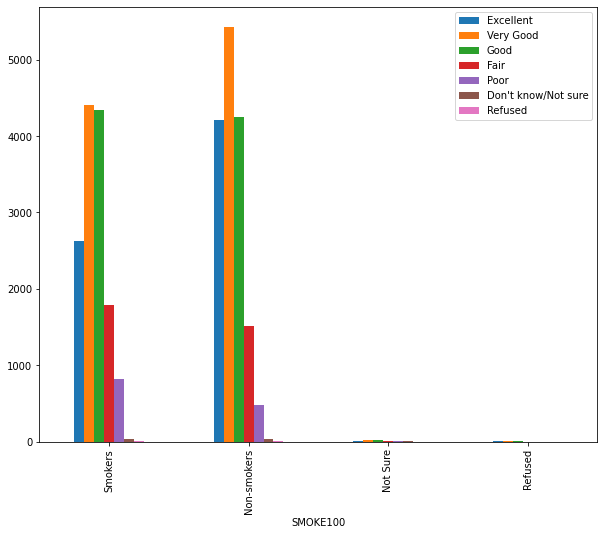

In [10]:
#  x axis represents if smoke100, if so ,x=1; otherwise x=2. x=7,9 means 'not sure'/'refused' respectively. y axis means frequency 
fig, ax = plt.subplots()
genhlth_count_ifsmoke.unstack().plot.bar(ax=ax) 
ax.legend(["Excellent","Very Good","Good","Fair","Poor","Don't know/Not sure","Refused"])
ax.set_xticklabels(["Smokers","Non-smokers","Not Sure","Refused"])
plt.show()

**We can clearly see from the plot that the general wellness is higher in non-smokers than in smokers**

**> BMI**
* > Next let’s consider a new variable bmi that doesn’t show up directly in this data set: Body Mass Index (BMI). 
* > Compute the bmi for each case in your sample and add it to the sample (e.g. as additional column). 
* > Visualize the distribution of the BMI in your sample.

In [11]:
Large_Columns_b['BMI'] = Large_Columns_b['WEIGHT']/((Large_Columns_b['HTF']*12+Large_Columns_b['HTI'])*(Large_Columns_b['HTF']*12+Large_Columns_b['HTI']))*703
Large_Columns_b.drop(Large_Columns_b[Large_Columns_b.HTI > 11].index, inplace = True) #drop the data whose height(iches) is 77 and 99(means Don't know and refused respectively)
Large_Columns_b.drop(Large_Columns_b[Large_Columns_b.WEIGHT > 776].index, inplace = True)#drop the data whose weight is 777 and 999(means Don't know and refused respectively)
Large_Columns_b.drop(Large_Columns_b[Large_Columns_b.HTF > 7].index, inplace = True)#drop the data whose height (feets) is 9(means refused)
BMI_data = Large_Columns_b['BMI']
BMI_data.drop(BMI_data[BMI_data == np.inf].index, inplace=True)# drop the data whose height is 0
BMI_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

0        26.605753
1        25.824490
2        26.037037
3        18.302959
4        22.317460
           ...    
29995    29.049587
29996    20.595703
29997    23.615963
29998    22.671325
29999    29.177246
Name: BMI, Length: 28810, dtype: float64

[Text(0.5, 0, 'BMI')]

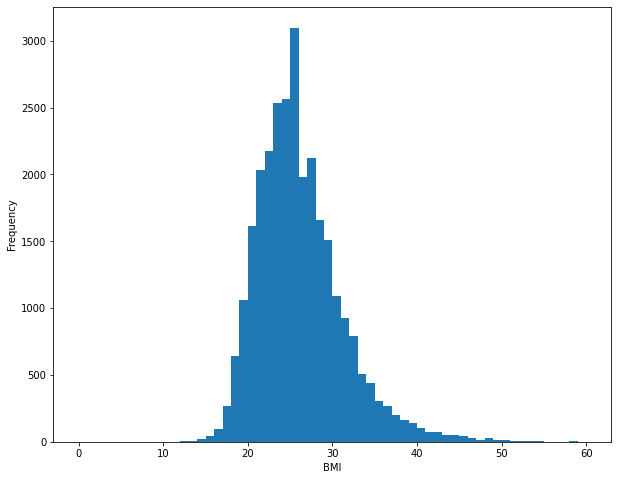

In [12]:
# It's a histogram, x axis represents BMI, y axis represents Frequency
ax = BMI_data.plot.hist('BMI', bins =60 , range=(0,60))
ax.set(xlabel = "BMI")

The distribution of BMI peaks around 25. Most of the population lies in healthy-overweight categories but a heavy tailed distribution indicates that a significant fraction of population is obese. 

Overall, we can see that different combinations and visualisations of data can provide with significant information about it.